<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# <h1 align="center" id="heading">Sentiment Analysis of Reddit Data using Reddit API</h1>

In this live coding session, we leverage the Python Reddit API Wrapper (`PRAW`) to retrieve data from subreddits on [Reddit](https://www.reddit.com), and perform sentiment analysis using [`pipelines`](https://huggingface.co/docs/transformers/main_classes/pipelines) from [HuggingFace ( 🤗 the GitHub of Machine Learning )](https://techcrunch.com/2022/05/09/hugging-face-reaches-2-billion-valuation-to-build-the-github-of-machine-learning/), powered by [transformer](https://arxiv.org/pdf/1706.03762.pdf).

## Objectives

At the end of the session, you will 

- know how to work with APIs
- feel more comfortable navigating thru documentation, even inspecting the source code
- understand what a `pipeline` object is in HuggingFace
- perform sentiment analysis using `pipeline`
- run a python script in command line and get the results

## How to Submit

- At the end of each task, commit* the work into the repository you created before the assignment
- After completing all three tasks, make sure to push the notebook containing all code blocks and output cells to your repository you created before the assignment
- Submit the link to the notebook in Canvas

\***NEVER** commit a notebook displaying errors unless it is instructed otherwise. However, commit often; recall git ABC = **A**lways **B**e **C**ommitting.

## Tasks

### Task I: Instantiate a Reddit API Object

The first task is to instantiate a Reddit API object using [PRAW](https://praw.readthedocs.io/en/stable/), through which you will retrieve data. PRAW is a wrapper for [Reddit API](https://www.reddit.com/dev/api) that makes interacting with the Reddit API easier unless you are already an expert of [`requests`](https://docs.python-requests.org/en/latest/).

#### 1. Install packages

Please ensure you've ran all the cells in the `imports.ipynb`, located [here](https://github.com/FourthBrain/MLE-8/blob/main/assignments/week-3-analyze-sentiment-subreddit/imports.ipynb), to make sure you have all the required packages for today's assignment.

####  2. Create a new app on Reddit 

Create a new app on Reddit and save secret tokens; refer to [post in medium](https://towardsdatascience.com/how-to-use-the-reddit-api-in-python-5e05ddfd1e5c) for more details.

- Create a Reddit account if you don't have one, log into your account.
- To access the API, we need create an app. Slight updates, on the website, you need to navigate to `preference` > `app`, or click [this link](https://www.reddit.com/prefs/apps) and scroll all the way down. 
- Click to create a new app, fill in the **name**, choose `script`, fill in  **description** and **redirect uri** ( The redirect URI is where the user is sent after they've granted OAuth access to your application (more info [here](https://github.com/reddit-archive/reddit/wiki/OAuth2)) For our purpose, you can enter some random url, e.g., www.google.com; as shown below.


    <img src="https://miro.medium.com/max/700/1*lRBvxpIe8J2nZYJ6ucMgHA.png" width="500"/>
- Jot down `client_id` (left upper corner) and `client_secret` 

    NOTE: CLIENT_ID refers to 'personal use script" and CLIENT_SECRET to secret.
    
    <div>
    <img src="https://miro.medium.com/max/700/1*7cGAKth1PMrEf2sHcQWPoA.png" width="300"/>
    </div>

- Create `secrets_reddit.py` in the same directory with this notebook, fill in `client_id` and `secret_id` obtained from the last step. We will need to import those constants in the next step.
    ```
    REDDIT_API_CLIENT_ID = "client_id"
    REDDIT_API_CLIENT_SECRET = "secret_id"
    REDDIT_API_USER_AGENT = "any string except bot; ex. My User Agent"
    ```
- Add `secrets_reddit.py` to your `.gitignore` file if not already done. NEVER push credentials to a repo, private or public. 

#### 3. Instantiate a `Reddit` object

Now you are ready to create a read-only `Reddit` instance. Refer to [documentation](https://praw.readthedocs.io/en/stable/code_overview/reddit_instance.html) when necessary.

In [2]:
import praw
import secrets_reddit

# Create a Reddit object which allows us to interact with the Reddit API
reddit = praw.Reddit(
    client_id=secrets_reddit.REDDIT_API_CLIENT_ID,
    client_secret=secrets_reddit.REDDIT_API_CLIENT_SECRET,
    user_agent=secrets_reddit.REDDIT_API_USER_AGENT,
)

In [3]:
print(reddit) 

<details>
<summary>Expected output:</summary>   

```<praw.reddit.Reddit object at 0x10f8a0ac0>```
</details>

#### 4. Instantiate a `subreddit` object

Lastly, create a `subreddit` object for your favorite subreddit and inspect the object. The expected output you will see ar from `r/machinelearning` unless otherwise specified.

In [7]:
subreddit = reddit.random_subreddit()
subreddit

Subreddit(display_name='AskPhysics')

What is the display name of the subreddit?

In [8]:
subreddit.display_name

'AskPhysics'

<details>
<summary>Expected output:</summary>   

    machinelearning
</details>

How about its title, is it different from the display name?

In [11]:
subreddit.title

'Ask Physics'

<details>
<summary>Expected output:</summary>   

    Machine Learning
</details>

Print out the description of the subreddit:

In [13]:
print(subreddit.description)

/r/AskPhysics exists to answer questions about physics.

* Questions should be relevant, and answers should be on-topic and correct.

* We don't condone cheating on school work, and homework questions should be handled [according to these guidelines.](https://www.reddit.com/r/AskPhysics/comments/563dcm/meta_yes_homework_questions_are_ok_heres_how_to/)

* Incivility will not be tolerated.

* If your question isn't answered in a day, you can post it in the Tuesday thread in /r/Physics (unless it's homework-related).

See also:

* /r/Physics

* /r/AskScience

* [The AskScience FAQ](https://www.reddit.com/r/askscience/wiki/faq)

###How to use LaTeX?

First, you will need to install one of the [recommended add-ons](/r/Physics/wiki/syntax).
To include an equation typeset in LaTeX in your post, put the LaTeX code between `` [;`` and ``;] ``.

[;i\hbar \frac{\partial}{\partial t}
\Psi = \hat H\Psi;]


<details>
<summary>Expected output:</summary>

    **[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
    --------
    +[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
    --------
    +[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
    --------
    +[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
    --------
    +[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict
</details>

### Task II: Parse comments

#### 1. Top Posts of All Time

Find titles of top 10 posts of **all time** from your favorite subreddit. Refer to [Obtain Submission Instances from a Subreddit Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html)) if necessary. Verify if the titles match what you read on Reddit.

In [65]:
# try run this line, what do you see? press q once you are done
?subreddit.top 

In [40]:
def print_posts(posts):
    for post in posts:
        print(f'[{post.score}] {post.title}')

In [41]:
print_posts(subreddit.top(limit=10, time_filter='all'))

[781] My advice to all youngsters: Don't spend your years at high school trying to get ahead for university
[497] I failed 5 out of 11 classes during my first year of university, studying physics. Do you ever feel not smart enough to dive into physics, do you ever think that your brain can't make your dreams come true because you just might not be as smart as you thought you were?
[405] The early physicist Torricelli wrote "We live submerged at the bottom of an ocean of air." Like we see on the ordinary oceans, are there giant waves of air crashing against each other in the upper atmosphere?
[346] I'm making puzzle game about learning real physic and mathematics. You are a little mage that visits villages and helps people. Forage/craft items by performing magic spells, build friendships, master schools of magic, become powerful. You study in the Library of Alexandria. Do you like it?
[342] Going 198% of the speed of light?
[337] What are your best (worst) physics jokes? Bonus points fo

<details> <summary>Expected output:</summary>

    [Project] From books to presentations in 10s with AR + ML
    [D] A Demo from 1993 of 32-year-old Yann LeCun showing off the World's first Convolutional Network for Text Recognition
    [R] First Order Motion Model applied to animate paintings
    [N] AI can turn old photos into moving Images / Link is given in the comments - You can also turn your old photo like this
    [D] This AI reveals how much time politicians stare at their phone at work
    [D] Types of Machine Learning Papers
    [D] The machine learning community has a toxicity problem
    [Project] NEW PYTHON PACKAGE: Sync GAN Art to Music with "Lucid Sonic Dreams"! (Link in Comments)
    [P] Using oil portraits and First Order Model to bring the paintings back to life
    [D] Convolution Neural Network Visualization - Made with Unity 3D and lots of Code / source - stefsietz (IG)    
</details>

#### 2. Top 10 Posts of This Week

What are the titles of the top 10 posts of **this week** from your favorite subreddit?

In [42]:
print_posts(subreddit.top(limit=10, time_filter='week'))

[75] How dense would the empire state building need to be for its gravity to cause a 6kg bowling ball dropped from the top to crash into the building before hitting the ground (dropped 1 m away from the building at the top)?
[67] How powerful can a laser theoretically be?
[57] How do we know that gravity should be added to quantum physics?
[43] Would I be smart enough to study physics?
[44] Could you survive jumping off the Empire State Building if you landed on 1 million pillows?
[41] What does observation really mean when talking about quantum physics?
[43] What does information mean in the context of physics? Like the black hole information paradox?
[42] The universe is expanding in the spatial dimensions. Is it also expanding in time?
[40] What's the reasoning behind placing dx in front of the integrand?
[30] If particles are excitations in a field, how do they move?


<details><summary>Expected output:</summary>

    [N] Ian Goodfellow, Apple’s director of machine learning, is leaving the company due to its return to work policy. In a note to staff, he said “I believe strongly that more flexibility would have been the best policy for my team.” He was likely the company’s most cited ML expert.
    [R][P] Thin-Plate Spline Motion Model for Image Animation + Gradio Web Demo
    [P] I’ve been trying to understand the limits of some of the available machine learning models out there. Built an app that lets you try a mix of CLIP from Open AI + Apple’s version of MobileNet, and more directly on your phone's camera roll.
    [R] Meta is releasing a 175B parameter language model
    [N] Hugging Face raised $100M at $2B to double down on community, open-source & ethics
    [P] T-SNE to view and order your Spotify tracks
    [D] : HELP Finding a Book - A book written for Google Engineers about foundational Math to support ML
    [R] Scaled up CLIP-like model (~2B) shows 86% Zero-shot on Imagenet
    [D] Do you use NLTK or Spacy for text preprocessing?
    [D] Democratizing Diffusion Models - LDMs: High-Resolution Image Synthesis with Latent Diffusion Models, a 5-minute paper summary by Casual GAN Papers
</details>

💽❓ Data Question:

Check out what other attributes the `praw.models.Submission` class has in the [docs](https://praw.readthedocs.io/en/stable/code_overview/models/submission.html). 

1. After having a chance to look through the docs, is there any other information that you might want to extract? How might this additional data help you?

Write a sample piece of code below extracting three additional pieces of information from the submission below.

In [44]:
submission = list(subreddit.top(limit=1))
submission[0].upvote_ratio, submission[0].num_comments, submission[0].edited

(0.97, 129, 1600317514.0)

💽❓ Data Question:

2. Is there any information available that might be a concern when it comes to Ethical Data?

It depends how you look at it. Reddit only shows us what data they have, and when you sign up you agree to give this data to them. However you can say no one reads the sign up clauses and so they shouldn't count, but given the data is public anyway, there's not much of an argument.

#### 3. Comment Code

Add comments to the code block below to describe what each line of the code does (Refer to [Obtain Comment Instances Section](https://praw.readthedocs.io/en/stable/getting_started/quick_start.html) when necessary). The code is adapted from [this tutorial](https://praw.readthedocs.io/en/stable/tutorials/comments.html)

The purpose is 
1. to understand what the code is doing 
2. start to comment your code whenever it is not self-explantory if you have not (others will thank you, YOU will thank you later 😊) 

In [47]:
%%time
# Time the full cell
from praw.models import MoreComments  # Load a comments module

# Load top comments through api here like so
top_comments = []

# Loop over every submission in top 10
for submission in subreddit.top(limit=10):
    # Get every comment
    for top_level_comment in submission.comments:
        # if its a deep comment, ignore
        if isinstance(top_level_comment, MoreComments):
            continue
        # if top level, add to top level
        top_comments.append(top_level_comment.body)

CPU times: user 165 ms, sys: 650 µs, total: 166 ms
Wall time: 15.4 s


#### 4. Inspect Comments

How many comments did you extract from the last step? Examine a few comments. 

In [48]:
#YOUR CODE HERE  # the answer may vary 693 for r/machinelearning
import pandas as pd
comment_df = pd.DataFrame(top_comments, columns=['comment'])
comment_df

,comment
0,"Of course, the reason so many are grinding so ..."
1,I think this stands true for college too.
2,"I'll second this opinion. In high school, unle..."
3,The only caveat I would mention is that someti...
4,A corollary I would have for this is instead o...
...,...
326,You could just scratch your own hair hard enou...
327,I would consider obtaining a square of cat fur...
328,Just measured my cat he’s rated for 100μF (mic...
329,"Charge up the cat, then discharge through a vo..."


In [49]:
import random

[random.choice(top_comments) for i in range(3)]

["DO MORE WORK. If you can't solve a problem, then solve a different problem. (ie, never show up empty handed.) If you won't do the work (and even the geniuses do the work) then you deserve the failure you experience. There are exceptions though, and these are usually undiagnosed adhd, depression, bipolar/schizo, financial pressure, inadequate sleep, yadda yadda yadda. Otherwise your failure to do the work and study is you to blame.",
 'The problem with arguing with these type of people, or even correcting/debating them, is simple. Crystal mommies are kinda hot.  \n\n\nLegit, I try and not be too dismissive, but make it clear that when we say "energy" and "frequency" and "quantum," we are not talking about the same things. Physicist\'s observations are repeatable and make predictions about the world. Woo practitioner\'s observations are subjective, psychologic/psychosomatic, and perceived individually, inwardly. That doesn\'t make them *false* prima facie, any more than a placebo is fa

<details> <summary>Some of the comments from `r/machinelearning` subreddit are:</summary>

    ['Awesome visualisation',
    'Similar to a stack or connected neurons.',
    'Will this Turing pass the Turing Test?']
</details>

💽❓ Data Question:

3. After having a chance to review a few samples of 5 comments from the subreddit, what can you say about the data? 

HINT: Think about the "cleanliness" of the data, the content of the data, think about what you're trying to do - how does this data line up with your goal?

The data is all in english and in "normal" online languages. Depending on goal it is very usable.

#### 5. Extract Top Level Comment from Subreddit `TSLA`.

Write your code to extract top level comments from the top 10 topics of a time period, e.g., year, from subreddit `TSLA` and store them in a list `top_comments_tsla`.  

In [50]:
%%time
top_comments_tsla = []

# Loop over every submission in top 10
for submission in reddit.subreddit('tsla').top(limit=10):
    # Get every comment
    for top_level_comment in submission.comments:
        # if its a deep comment, ignore
        if isinstance(top_level_comment, MoreComments):
            continue
        # if top level, add to top level
        top_comments_tsla.append(top_level_comment.body)

CPU times: user 93.2 ms, sys: 0 ns, total: 93.2 ms
Wall time: 3.6 s


In [51]:
len(top_comments_tsla) # Expected: 174 for r/machinelearning

170

In [52]:
[random.choice(top_comments_tsla) for i in range(3)]

['🙌 I have never sold a share since 2017, and keep dollar cost averaging in.',
 'What do you guys think of EV competition from tradition automakers? Can traditional auto makers like GM catch up in terms of EV market share in near future/ ever?',
 "$580 and falling today. What's your price target?"]

<details>
<summary>Some of the comments from `r/TSLA` subreddit:</summary>

    ['I bought puts',
    '100%',
    'Yes. And I’m bag holding 1200 calls for Friday and am close to throwing myself out the window']
</details>

💽❓ Data Question:

4. Now that you've had a chance to review another subreddits comments, do you see any differences in the kinds of comments either subreddit has - and how might this relate to bias?

Yes this one is all about cars and stocks, compared to physics. quite different, will lead to a bias in viewpoint and in demographics

### Task III: Sentiment Analysis

Let us analyze the sentiment of comments scraped from `r/TSLA` using a pre-trained HuggingFace model to make the inference. Take a [Quick tour](https://huggingface.co/docs/transformers/quicktour). 

#### 1. Import `pipeline`

In [53]:
from transformers import pipeline

#### 2. Create a Pipeline to Perform Task "sentiment-analysis"

In [54]:
sentiment_model = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")

Downloading:   0%|          | 0.00/687 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

#### 3. Get one comment from list `top_comments_tsla` from Task II - 5.

In [55]:
comment = random.choice(top_comments_tsla)

In [56]:
comment

"You're a fucking legend"

The example comment is: `'Bury Burry!!!!!'`. Print out what you get. For reproducibility, use the same comment in the next step; consider setting a seed.

#### 4. Make Inference!

In [57]:
sentiment = sentiment_model(comment)
sentiment

[{'label': 'POSITIVE', 'score': 0.9981127977371216}]

What is the type of the output `sentiment`?

```
Very positive, as expected for this input
```

In [58]:
print(f'The comment: {comment}')
print(f'Predicted Label is {sentiment[0]["label"]} and the score is {sentiment[0]["score"]:.3f}')

The comment: You're a fucking legend
Predicted Label is POSITIVE and the score is 0.998


For the example comment, the output is:

    The comment: Bury Burry!!!!!
    Predicted Label is NEGATIVE and the score is 0.989

🖥️❓ Model Question:

1. What does the score represent?
How sure the model is of its answer

### Task IV: Put All Together

Let's pull all the piece together, create a simple script that does 

- get the subreddit
- get comments from the top posts for given subreddit
- run sentiment analysis 

#### Complete the Script

Once you complete the code, running the following block writes the code into a new Python script and saves it as `top_tlsa_comment_sentiment.py` under the same directory with the notebook. 

In [63]:
%%writefile top_tlsa_comment_sentiment.py

import secrets_reddit
import random

from typing import Dict, List

from praw import Reddit
from praw.models.reddit.subreddit import Subreddit
from praw.models import MoreComments

from transformers import pipeline


def get_subreddit(display_name:str) -> Subreddit:
    """Get subreddit object from display name

    Args:
        display_name (str): [description]

    Returns:
        Subreddit: [description]
    """
    reddit = Reddit(
        client_id=secrets_reddit.REDDIT_API_CLIENT_ID,        
        client_secret=secrets_reddit.REDDIT_API_CLIENT_SECRET,
        user_agent=secrets_reddit.REDDIT_API_USER_AGENT
        )
    
    subreddit = reddit.subreddit(display_name)
    return subreddit

def get_comments(subreddit:Subreddit, limit:int=3) -> List[str]:
    """ Get comments from subreddit

    Args:
        subreddit (Subreddit): [description]
        limit (int, optional): [description]. Defaults to 3.

    Returns:
        List[str]: List of comments
    """
    top_comments = []
    for submission in subreddit.top(limit=limit):
        for top_level_comment in submission.comments:
            if isinstance(top_level_comment, MoreComments):
                continue
            top_comments.append(top_level_comment.body)
    return top_comments

def run_sentiment_analysis(comment:str) -> Dict:
    """Run sentiment analysis on comment using default distilbert model
    
    Args:
        comment (str): [description]
        
    Returns:
        str: Sentiment analysis result
    """
    sentiment_model = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")
    sentiment = sentiment_model(comment)
    return sentiment[0]


if __name__ == '__main__':
    subreddit = get_subreddit('wallstreetbets')
    comments = get_comments(subreddit)
    comments = random.sample(comments, 10)
    for comment in comments:
        sentiment = run_sentiment_analysis(comment)
        print(f'The comment: {comment}')
        print(f'Predicted Label is {sentiment["label"]} and the score is {sentiment["score"]:.3f}')

Overwriting top_tlsa_comment_sentiment.py


Run the following block to see the output.

In [64]:
!python top_tlsa_comment_sentiment.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
The comment: FINALLY JUMPED IN TODAY AT $260 TO SEE IT PLUMMET TO $160 WITHIN AN HOUR, BUT MOMMA DIDN'T RAISE NO BITCH  💎✋  💎✋  💎✋  💎✋  💎✋  🚀🚀🚀🚀🚀 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
Predicted Label is NEGATIVE and the score is 0.998
The comment: They need to be sued.  I’m closing my account with them..
Predicted Label is NEGATIVE and the score is 0.999
The comment: It's no longer about making money, it's about sending a message. 

Screw censorship.
Predicted Label is POSITIVE and the score is 0.999
The comment: OK ALL IS WELL
Predicted Label is NEGATIVE and the score is 0.986
The comment: [deleted]
Predicted Label is NEGATIVE and the score is 0.998
The comment: Feels almost nostalgic fin

<details><summary> Expected output:</summary>

    No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
    The comment: When is DOGE flying
    Predicted Label is POSITIVE and the score is 0.689
</details>

💽❓ Data Question:

5. Is the subreddit active? About how many posts or threads per day? How could you find this information?

According to this you can get number of posts per day through here https://www.reddit.com/r/redditdev/comments/qcn2o8/comment/hhh2sly/?utm_source=share&utm_medium=web2x&context=3
But likely someone else does this data collection for us:
https://subredditstats.com/r/wallstreetbets
513 posts per day, many more comments

💽❓ Data Question:

6. Does there seem to be a large distribution of posters or a smaller concentration of posters who are very active? What kind of impact might this have on the data?

Smaller concentration of very active posters, which would lead to biasing the model on certain viewpoints and style

In [66]:
import secrets_reddit
import random

from typing import Dict, List

from praw import Reddit
from praw.models.reddit.subreddit import Subreddit
from praw.models import MoreComments

from transformers import pipeline


def get_subreddit(display_name:str) -> Subreddit:
    """Get subreddit object from display name

    Args:
        display_name (str): [description]

    Returns:
        Subreddit: [description]
    """
    reddit = Reddit(
        client_id=secrets_reddit.REDDIT_API_CLIENT_ID,        
        client_secret=secrets_reddit.REDDIT_API_CLIENT_SECRET,
        user_agent=secrets_reddit.REDDIT_API_USER_AGENT
        )
    
    subreddit = reddit.subreddit(display_name)
    return subreddit

def get_comments(subreddit:Subreddit, limit:int=3, submissions=None) -> List[str]:
    """ Get comments from subreddit

    Args:
        subreddit (Subreddit): [description]
        limit (int, optional): [description]. Defaults to 3.

    Returns:
        List[str]: List of comments
    """
    top_comments = []
    for submission in submissions:
        for top_level_comment in submission.comments:
            if isinstance(top_level_comment, MoreComments):
                continue
            top_comments.append(top_level_comment.body)
    return top_comments

def run_sentiment_analysis(comment:str) -> Dict:
    """Run sentiment analysis on comment using default distilbert model
    
    Args:
        comment (str): [description]
        
    Returns:
        str: Sentiment analysis result
    """
    sentiment_model = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")
    sentiment = sentiment_model(comment)
    return sentiment[0]

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [106]:
# Plot sentiment of post titles for top 50 posts
subr = get_subreddit('wallstreetbets')
n = 50
top_n_posts = list(subr.top(limit=n))
top_n_post_sentiments = sentiment_model([p.title for p in top_n_posts])
# Create df
attributes = ['title', 'score', 'created_utc', 'upvote_ratio', 'num_comments']
post_df = pd.DataFrame([[getattr(t, atr) for atr in attributes] + [sent['label'], sent['score']] for t, sent in zip(top_n_posts, top_n_post_sentiments)], columns=attributes + ['sentiment_label', 'sentiment_score'])
post_df.head(1), post_df.describe()

,title,score,created_utc,upvote_ratio,num_comments,sentiment_label,sentiment_score
0,Times Square right now,470591,1.612030e+09,0.99,13740,POSITIVE,0.991911
1,UPVOTE so everyone sees we got SUPPORT,332360,1.611841e+09,0.98,12933,POSITIVE,0.998546
2,GME YOLO update — Jan 28 2021,294332,1.611868e+09,0.98,23281,POSITIVE,0.989071
3,GME YOLO month-end update — Jan 2021,260644,1.611954e+09,0.97,20203,POSITIVE,0.995209
4,It’s treason then,240211,1.611964e+09,0.98,4642,NEGATIVE,0.997330
5,🔮WallStreetBets Predictions Tournament for Oct...,229469,1.667023e+09,0.87,1171,POSITIVE,0.995086
6,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,226590,1.611842e+09,0.97,18064,NEGATIVE,0.999422
7,GME YOLO update — Feb 19 2021,221821,1.613769e+09,0.96,13047,POSITIVE,0.990049
8,🔮WallStreetBets Predictions Tournament for Sep...,216657,1.664412e+09,0.89,1490,POSITIVE,0.994989
9,GME YOLO update — Jan 27 2021 ----------------...,216062,1.611782e+09,0.96,14861,NEGATIVE,0.999246


In [108]:
# Add extra features
post_df['log_score'] = np.log2(post_df['score'])
post_df['log_sentiment_score'] = np.log2(post_df['sentiment_score'])
post_df.describe()

,score,created_utc,upvote_ratio,num_comments,sentiment_score,log_score,log_sentiment_score
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000
mean,187368.240000,1.615662e+09,0.944400,7625.460000,0.986949,17.467437,-0.022540
std,57629.828718,1.253210e+07,0.028867,6149.130797,0.059463,0.350560,0.111778
min,140034.000000,1.611782e+09,0.870000,745.000000,0.575993,17.095418,-0.795878
25%,149941.000000,1.611871e+09,0.930000,3558.250000,0.993853,17.193984,-0.008896
50%,170831.500000,1.611971e+09,0.950000,5803.000000,0.996953,17.382178,-0.004403
75%,210098.500000,1.612304e+09,0.970000,8093.250000,0.998394,17.679967,-0.002319
max,470591.000000,1.667023e+09,0.990000,26630.000000,0.999422,18.844114,-0.000834


<AxesSubplot:xlabel='upvote_ratio', ylabel='sentiment_score'>

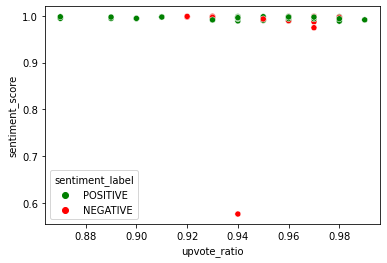

In [117]:
sns.scatterplot(x=post_df['upvote_ratio'], y=post_df['sentiment_score'], hue=post_df['sentiment_label'], palette=['green', 'red'])

In [121]:
# Plot the same for comments
import concurrent.futures  # Use multi threading for speed
def get_toplevel_comments(submission):
    return [top_level_comment.body for top_level_comment in submission.comments if not isinstance(top_level_comment, MoreComments)]

top_n_comments = []
with concurrent.futures.ThreadPoolExecutor(max_workers=7) as tpe:
    for post_idx, comments in enumerate(tpe.map(get_toplevel_comments, top_n_posts)):
#         print(f"Done with {post_idx}")
        top_n_comments.append(comments)
top_n_comments[0][0], top_n_comments[-1][-1]

('Someone needs to open a GameStop across the ny stock exchange 💎🙌',
 'I think we all will get that tattoo. And forever that brand will be a reminder to never doubt that retards are capable of achieving the retarded.')

In [126]:
top_n_comments_sentiments = []
max_seq_length = 512
max_comments = 514
# sentiment_model will automatically use multiple cores so no need to use a Thread/Process Pool
for post_idx, comments in enumerate(top_n_comments):
    top_n_comments_sentiments.append(sentiment_model([c[:max_seq_length] for c in comments[:max_comments]]))
top_n_comments_sentiments[0][:5]

RuntimeError: The expanded size of the tensor (1508) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1508].  Tensor sizes: [1, 514]

In [135]:
# Create df
comment_df = pd.DataFrame(
    [
        [p_idx, c_body, sent['label'], sent['score']]
        for p_idx, (comments, sents) in enumerate(zip(top_n_comments, top_n_comments_sentiments))
        for c_body, sent in zip(comments, sents)
    ],
    columns=['post_idx', 'body', 'sentiment_label', 'sentiment_score'],
)
comment_df.head(1), comment_df.describe()

(   post_idx                                               body  \
 0         0  Someone needs to open a GameStop across the ny...   
 
   sentiment_label  sentiment_score  
 0        POSITIVE         0.996979  ,
           post_idx  sentiment_score
 count  1262.000000      1262.000000
 mean      5.159271         0.991235
 std       2.578965         0.030822
 min       0.000000         0.536056
 25%       3.000000         0.993899
 50%       5.000000         0.997743
 75%       8.000000         0.998624
 max       8.000000         0.999508)

In [140]:
df = comment_df.set_index('post_idx').merge(post_df, left_index=True, right_index=True, suffixes=['_comment', '_post'])
df

,body,sentiment_label_comment,sentiment_score_comment,title,score,created_utc,upvote_ratio,num_comments,sentiment_label_post,sentiment_score_post,log_score,log_sentiment_score
0,Someone needs to open a GameStop across the ny...,POSITIVE,0.996979,Times Square right now,470591,1.612030e+09,0.99,13740,POSITIVE,0.991911,18.844114,-0.011718
0,Bro wtf... 2021 is crazy.,NEGATIVE,0.994540,Times Square right now,470591,1.612030e+09,0.99,13740,POSITIVE,0.991911,18.844114,-0.011718
0,This is the hype we need for next week!\n\nWE ...,POSITIVE,0.998700,Times Square right now,470591,1.612030e+09,0.99,13740,POSITIVE,0.991911,18.844114,-0.011718
0,This is easily one of the greatest things to h...,POSITIVE,0.998782,Times Square right now,470591,1.612030e+09,0.99,13740,POSITIVE,0.991911,18.844114,-0.011718
0,Just when you think this sub can't be any dumb...,NEGATIVE,0.998377,Times Square right now,470591,1.612030e+09,0.99,13740,POSITIVE,0.991911,18.844114,-0.011718
...,...,...,...,...,...,...,...,...,...,...,...,...
8,BABOONS ASS RED HOLMES 🙊 🩸,POSITIVE,0.996992,🔮WallStreetBets Predictions Tournament for Sep...,216657,1.664412e+09,0.89,1490,POSITIVE,0.994989,17.725053,-0.007247
8,Tanking again,NEGATIVE,0.999424,🔮WallStreetBets Predictions Tournament for Sep...,216657,1.664412e+09,0.89,1490,POSITIVE,0.994989,17.725053,-0.007247
8,[DOOM!](https://youtu.be/xoCZ07hwoZ4),NEGATIVE,0.995840,🔮WallStreetBets Predictions Tournament for Sep...,216657,1.664412e+09,0.89,1490,POSITIVE,0.994989,17.725053,-0.007247
8,Yoooooooooo,POSITIVE,0.998483,🔮WallStreetBets Predictions Tournament for Sep...,216657,1.664412e+09,0.89,1490,POSITIVE,0.994989,17.725053,-0.007247


<AxesSubplot:xlabel='sentiment_score_post', ylabel='sentiment_score_comment'>

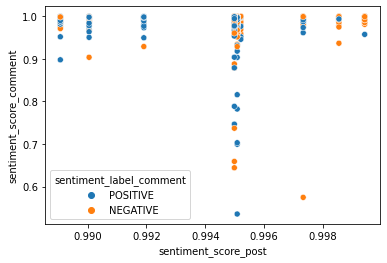

In [142]:
sns.scatterplot(x=df['sentiment_score_post'], y=df['sentiment_score_comment'], hue=df['sentiment_label_comment'])

In [144]:
df.groupby(['sentiment_label_post'])['sentiment_label_comment'].value_counts()

sentiment_label_post  sentiment_label_comment
NEGATIVE              NEGATIVE                    89
                      POSITIVE                    49
POSITIVE              NEGATIVE                   563
                      POSITIVE                   561
Name: sentiment_label_comment, dtype: int64

In [146]:
# Interesting, when posts are negative, comments are 2:1 more negative.
# When posts are positive, comments are 1:1.
# Maybe reddit is by default toxic?